In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl

Import file, drop columns, set index, create new columns( odds1_true : true probability given by odds, odds2_true: ")

In [391]:
# import the file with the predicted data from our NN model
data = pd.read_csv('predicted_data.csv')

#drop some columns
data = data.drop('Unnamed: 0', 1)
data = data.drop('index', 1)

# set an index 
data.set_index(['GAME_DATE', 'HOME', 'AWAY'])

# new columns: true probabilities given by odds
data['odds1_true'] = 1/ pd.to_numeric(data['Odds1'],errors='coerce')
data['odds2_true'] = 1/ pd.to_numeric(data['Odds2'], errors='coerce')

# the sum of those probabilities
data['odds_total'] = data['odds1_true'] + data['odds2_true']

# our prediction for the away team
data['pred_away'] = 1 - pd.to_numeric(data['prediction'], errors='coerce')

# rename the prediction column to the predition for home team
data.rename(columns={'prediction': 'pred_home'}, inplace=True)

In [392]:
# re-order columns

data = data[[
 'GAME_DATE',
 'HOME',
 'AWAY','Score',
 'Odds1',
 'Odds2',
 'odds_total',
 'odds1_true',
 'odds2_true',
 'pred_home',
 'pred_away',
    'Results']]


In [393]:
# transform the true probabilities to float
data[['odds1_true', 'odds2_true']].astype(float)

# add 0.02 to the probabilities to compensate for the bookmaker's margin
data['odds1_true_02'] = pd.to_numeric(data['odds1_true'],errors='coerce') + 0.02
data['odds2_true_02'] = pd.to_numeric(data['odds2_true'],errors='coerce') + 0.02

#### Betting strategy: 
###### We want ot determine under which confidence intervals our model can outperform  the bookmaker.
Each function takes three conditions:

##### 1) Our prediction has a higher confidence than the bookmakers prediction 
##### 2) A confidence interval of 0.05
##### 3) The stake need to have 1 unit of profit
3.1) To calculate the stake:
<br>
  (Odds * stake) - stake = 1
<br>
We calculate the odds taking the median of our confidence interval confidence.
<br>
The Odds are given by 1/ probability.
<br>
The stake then can be simply calculate as 2/Odds.
<br>
For example:
<br>
For the confidence interval of 0.5-0.55, we take 0.525
<br>
Odds = 1/ 0.525 = 1.9
<br>
Stake = 2/1.9 = 1.11
<br>
(1.90 * 1.11) - 1.11 = 1

In [394]:
# define the functions as explained
def roi41h(df):
    if df['pred_home'] > df['odds1_true_02']:
        if df['pred_home'] >= 0.0 and df['pred_home'] <0.45:
            return df['Results'] * df['Odds1'] * 0.85 -0.85
def roi42h(df):
    if df['pred_home'] > df['odds1_true_02']:
        if df['pred_home']> 0.45 and df['pred_home'] <=0.5:
            return df['Results'] * df['Odds1'] * 0.95 - 0.95
def roi51h(df):
    if df['pred_home'] > df['odds1_true_02']:
        if df['pred_home'] >= 0.5 and df['pred_home'] <0.55:
            return df['Results'] * df['Odds1'] * 1.11 -1.11
def roi52h(df):
    if df['pred_home'] > df['odds1_true_02']:
        if df['pred_home']> 0.55 and df['pred_home'] <=0.6:
            return df['Results'] * df['Odds1'] * 1.37 - 1.37
def roi61h(df):  
    if df['pred_home'] > df['odds1_true_02']:
        if df['pred_home']> 0.6  and df['pred_home'] <=0.65:
            return df['Results'] * df['Odds1'] * 1.66 -1.66
def roi62h(df):
    if df['pred_home'] > df['odds1_true_02']:
        if df['pred_home'] >= 0.65 and df['pred_home'] <0.7:
            return df['Results'] * df['Odds1'] * 2.08 -2.08
def roi71h(df):
    if df['pred_home'] > df['odds1_true_02']:
        if df['pred_home']> 0.7 and df['pred_home'] <=0.75:
            return df['Results'] * df['Odds1'] * 2.63 - 2.63
def roi72h(df):
    if df['pred_home'] > df['odds1_true_02']:
        if df['pred_home']> 0.75 and df['pred_home'] <=0.8:
            return df['Results'] * df['Odds1'] * 3.44 -3.44
def roi8h(df):
    if df['pred_home'] > df['odds1_true_02']:
        if df['pred_home']> 0.8 and df['pred_home'] <=0.85:
            return df['Results'] * df['Odds1'] * 4.76 -4.76
              
def roi21a(df):
     if df['pred_away'] > df['odds2_true_02']:
        if df['pred_away'] >= 0.2 and df['pred_away'] <0.25:
            return df['Results'] * df['Odds2'] * 0.45 -0.45        
def roi22a(df):
     if df['pred_away'] > df['odds2_true_02']:
        if df['pred_away'] >= 0.25 and df['pred_away'] <0.3:
            return df['Results'] * df['Odds2'] * 0.55 -0.55                
def roi31a(df):
     if df['pred_away'] > df['odds2_true_02']:
        if df['pred_away'] >= 0.30 and df['pred_away'] <0.35:
            return df['Results'] * df['Odds2'] * 0.65 -0.65        
def roi32a(df):
     if df['pred_away'] > df['odds2_true_02']:
        if df['pred_away'] >= 0.35 and df['pred_away'] <0.4:
            return df['Results'] * df['Odds2'] * 0.75 -0.75        
def roi41a(df):
     if df['pred_away'] > df['odds2_true_02']:
        if df['pred_away'] >= 0.40 and df['pred_away'] <0.45:
            return df['Results'] * df['Odds2'] * 0.85 -0.85                
def roi42a(df):
     if df['pred_away'] > df['odds2_true_02']:
        if df['pred_away'] >= 0.45 and df['pred_away'] <0.5:
            return df['Results'] * df['Odds2'] * 0.95 -0.95        
def roi51a(df):
    if df['pred_away'] > df['odds2_true_02']:
        if df['pred_away'] >= 0.5 and df['pred_away'] <0.55:
            return df['Results'] * df['Odds2'] * 1.11 -1.11
def roi52a(df):
    if df['pred_away'] > df['odds2_true_02']:
        if df['pred_away']> 0.55 and df['pred_away'] <=0.6:
            return df['Results'] * df['Odds1'] * 1.37 - 1.37
def roi61a(df):  
    if df['pred_away'] > df['odds2_true_02']:
        if df['pred_away']> 0.6  and df['pred_away'] <=0.65:
            return df['Results'] * df['Odds2'] * 1.66 -1.66
def roi62a(df):
    if df['pred_away'] > df['odds2_true_02']:
        if df['pred_away'] >= 0.65 and df['pred_away'] <0.7:
            return df['Results'] * df['Odds2'] * 2.08 -2.08
def roi71a(df):
    if df['pred_away'] > df['odds2_true_02']:
        if df['pred_away']> 0.7 and df['pred_away'] <=0.75:
            return df['Results'] * df['Odds2'] * 2.63 - 2.63
def roi72a(df):
    if df['pred_away'] > df['odds2_true_02']:
        if df['pred_away']> 0.75 and df['pred_away'] <=0.8:
            return df['Results'] * df['Odds2'] * 3.44 -3.44
def roi8a(df):
    if df['pred_away'] > df['odds2_true_02']:
        if df['pred_away']> 0.8 and df['pred_away'] <=0.85:
            return df['Results'] * df['Odds2'] * 4.76 -4.76
        
# create new columns in the dataframe with our functions

data['roi41h'] = data.apply(roi41h, axis=1)
data['roi42h'] = data.apply(roi42h, axis=1)        
data['roi51h'] = data.apply(roi51h, axis=1)
data['roi52h'] = data.apply(roi52h, axis=1)
data['roi61h'] = data.apply(roi61h, axis=1)
data['roi62h'] = data.apply(roi62h, axis=1)
data['roi71h'] = data.apply(roi71h, axis=1)
data['roi72h'] = data.apply(roi72h, axis=1)
data['roi8h'] = data.apply(roi8h, axis=1)


data['roi21a'] = data.apply(roi21a, axis=1)
data['roi22a'] = data.apply(roi22a, axis=1)
data['roi31a'] = data.apply(roi31a, axis=1)
data['roi32a'] = data.apply(roi32a, axis=1)
data['roi41a'] = data.apply(roi41a, axis=1)
data['roi42a'] = data.apply(roi42a, axis=1)
data['roi51a'] = data.apply(roi51a, axis=1)
data['roi52a'] = data.apply(roi52a, axis=1)
data['roi61a'] = data.apply(roi61a, axis=1)
data['roi62a'] = data.apply(roi62a, axis=1)
data['roi71a'] = data.apply(roi71a, axis=1)
data['roi72a'] = data.apply(roi72a, axis=1)
data['roi8a'] = data.apply(roi8a, axis=1)
data['roi_total_a_pos'] = data.fillna(0)['roi21a'] + data.fillna(0)['roi22a'] + data.fillna(0)['roi31a'] + data.fillna(0)['roi32a'] + data.fillna(0)['roi41a'] + data.fillna(0)['roi42a']+ data.fillna(0)['roi51a']

#data['roi_total'] = data.fillna(0)['roi1h'] + data.fillna(0)['roi2h'] + data.fillna(0)['roi3h'] + data.fillna(0)['roi1a'] + data.fillna(0)['roi2a'] + data.fillna(0)['roi3a']
#data['roi_total_cum'] = data['roi_total'].cumsum()
#data.reset_index(inplace=True)
data['GAME_DATE'] = pd.to_datetime(data['GAME_DATE'])
data.sort_values(by='GAME_DATE', inplace=True)

#data.set_index('GAME_DATE', inplace=True)
data

,GAME_DATE,HOME,AWAY,Score,Odds1,Odds2,odds_total,odds1_true,odds2_true,pred_home,...,roi41a,roi42a,roi51a,roi52a,roi61a,roi62a,roi71a,roi72a,roi8a,roi_total_a_pos
120,2019-01-12,MIN,MEM,107:115,1.13,6.72,1.033765,0.884956,0.148810,0.702113,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.550
119,2019-01-12,LAL,DAL,100:114,1.37,3.23,1.039525,0.729927,0.309598,0.480159,...,NaN,NaN,-1.11,NaN,NaN,NaN,NaN,NaN,NaN,-1.110
124,2019-01-12,TOR,UTA,130:110,1.78,2.10,1.037988,0.561798,0.476190,0.791396,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000
118,2019-01-12,LAC,WAS,150:125,1.11,7.28,1.038264,0.900901,0.137363,0.700381,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.454
121,2019-01-12,NOP,OKC,104:107,1.70,2.23,1.036666,0.588235,0.448430,0.611294,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,2022-12-03,GSW,MIL,122:109,2.17,1.74,1.035542,0.460829,0.574713,0.413500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000
2636,2022-12-03,MIA,MIN,104:113,1.62,2.38,1.037452,0.617284,0.420168,0.474418,...,NaN,NaN,-1.11,NaN,NaN,NaN,NaN,NaN,NaN,-1.110
2637,2022-12-03,POR,WAS,127:118,3.14,1.38,1.043109,0.318471,0.724638,0.296308,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000
2638,2022-12-03,SAS,IND,108:119,1.82,2.05,1.037255,0.549451,0.487805,0.642137,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000


In [395]:
# calculate the cumulative value for the columns in which we applies the functions

data['roi41h_cum'] = data['roi41h'].cumsum()
data['roi42h_cum'] = data['roi42h'].cumsum()
data['roi51h_cum'] = data['roi51h'].cumsum()
data['roi52h_cum'] = data['roi52h'].cumsum()
data['roi61h_cum'] = data['roi61h'].cumsum()
data['roi62h_cum'] = data['roi62h'].cumsum()
data['roi71h_cum'] = data['roi71h'].cumsum()
data['roi72h_cum'] = data['roi72h'].cumsum()
data['roi8h_cum'] = data['roi8h'].cumsum()

data['roi_total_cum_a_pos'] = data['roi_total_a_pos'].cumsum()
data['roi21a_cum'] = data['roi21a'].cumsum()
data['roi22a_cum'] = data['roi22a'].cumsum()
data['roi31a_cum'] = data['roi31a'].cumsum()
data['roi32a_cum'] = data['roi32a'].cumsum()
data['roi41a_cum'] = data['roi41a'].cumsum()
data['roi42a_cum'] = data['roi42a'].cumsum()
data['roi51a_cum'] = data['roi51a'].cumsum()
data['roi52a_cum'] = data['roi52a'].cumsum()
data['roi61a_cum'] = data['roi61a'].cumsum()
data['roi62a_cum'] = data['roi62a'].cumsum()
data['roi71a_cum'] = data['roi71a'].cumsum()
#data['roi72a_cum'] = data['roi72a'].cumsum()
#data['roi8a_cum'] = data['roi8a'].cumsum()

#data_roi = data[['roi51h_cum','roi52h_cum','roi61h_cum','roi62h_cum','roi71h_cum','roi72h_cum','roi8h_cum','roi51a_cum','roi52a_cum','roi61a_cum','roi62a_cum','roi71a_cum','roi72a_cum','roi8a_cum','roi42a_cum','roi41a_cum','roi42h_cum','roi41h_cum','roi31a_cum','roi32a_cum','roi21a_cum','roi22a_cum','roi11a_cum','roi12a_cum','GAME_DATE']]
data_roi = data[['roi51a_cum','roi52a_cum','roi61a_cum','roi62a_cum','roi71a_cum','roi42a_cum','roi41a_cum','roi31a_cum','roi32a_cum','roi21a_cum','roi22a_cum','roi_total_cum_a_pos','GAME_DATE']]

In [396]:
# sort by the date of the game
data_roi.set_index('GAME_DATE', inplace=True)
data_roi

,roi51a_cum,roi52a_cum,roi61a_cum,roi62a_cum,roi71a_cum,roi42a_cum,roi41a_cum,roi31a_cum,roi32a_cum,roi21a_cum,roi22a_cum,roi_total_cum_a_pos
GAME_DATE,,,,,,,,,,,,
2019-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.550,-0.5500
2019-01-12,-1.1100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.6600
2019-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.6600
2019-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.904,1.7940
2019-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.7940
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,940.3853
2022-12-03,82.9503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,939.2753
2022-12-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,939.2753


<AxesSubplot:xlabel='GAME_DATE'>

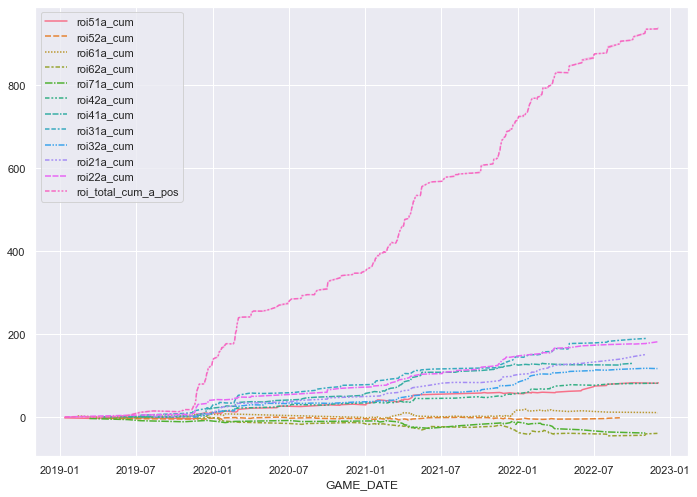

In [397]:
# plot the cumulative values
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=data_roi )

In [398]:
data.to_csv('pred_data_MSE_base.csv')

In [383]:

for i in data_roi.columns:
    print(i, ':',data_roi[i].max())



roi51a_cum : 79.25400000000005
roi52a_cum : 1.4110999999999996
roi61a_cum : 11.138599999999995
roi62a_cum : -0.6239999999999992
roi71a_cum : 0.7363999999999993
roi42a_cum : 124.53549999999987
roi41a_cum : 191.17350000000002
roi42h_cum : 7.628499999999997
roi41h_cum : 3.213
roi31a_cum : 269.5355
roi32a_cum : 199.70999999999998
roi21a_cum : 178.02900000000002
roi22a_cum : 249.67249999999993
roi_total_cum_a_pos : 1291.0599999999993
